# Exploration B Reduction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans # clustering
from sklearn.metrics import silhouette_score # clustering
from sklearn.manifold import TSNE 

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/iris.csv')
print(data.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


### 2. K-Means clustering with k = 3 

cluster0 = [50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]
Cluster  0  has   + 62
cluster1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Cluster  1  has   + 50
cluster2 = [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]
Cluster  2  has   + 38


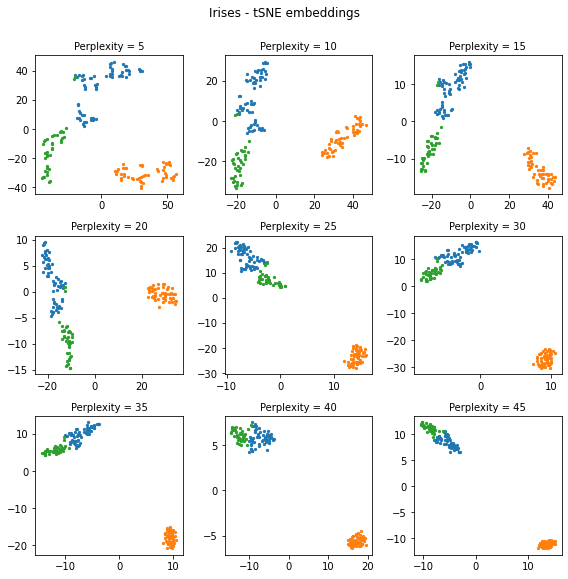

In [15]:
selected = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

k = 3
raw_data = data[selected]
#raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = False
perplexities = [5, 10, 15, 20,25,30,35,40,45]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
raw_data['label'] = k_means.fit_predict(raw_data)
for c in range(k):
    cluster = raw_data[raw_data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    print(f'Cluster  {c}  has   + {len(list(cluster.index))}')
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Irises - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(3,3, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1], s=5)
    #if annotate:
    #    for i, name in enumerate(clustered_data.index):
    #        sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

### 3. k-means clustering with k = 2 and compute another 9 t-SNE embeddings

cluster0 = [50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Cluster  0  has   + 97
cluster1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57, 93, 98]
Cluster  1  has   + 53


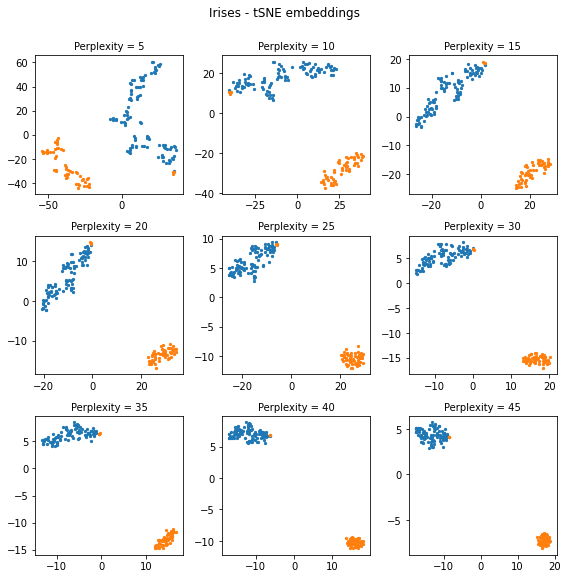

In [14]:
selected = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

k = 2
raw_data = data[selected]
#raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = False
perplexities = [5, 10, 15, 20,25,30,35,40,45]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
raw_data['label'] = k_means.fit_predict(raw_data)
for c in range(k):
    cluster = raw_data[raw_data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    print(f'Cluster  {c}  has   + {len(list(cluster.index))}')
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Irises - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(3,3, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1], s=5)
    #if annotate:
    #    for i, name in enumerate(clustered_data.index):
    #        sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()